<a href="https://colab.research.google.com/github/NhatTruong1406/AI/blob/main/4banh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



https://drive.google.com/drive/folders/1crywi-8N5YjHtyWftu63lSu5FVL2oOxp?usp=sharing

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
import os
train_image_files_path = "/content/drive/MyDrive/4banh/train"
valid_image_files_path = "/content/drive/MyDrive/4banh/test"

In [4]:
label=['banhdalon','banhhoi','banhuot','banhxeo']

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

In [6]:
train_generator = train_data_gen.flow_from_directory(train_image_files_path, target_size=(155,155), class_mode='categorical')      
validation_generator = validation_data_gen.flow_from_directory(valid_image_files_path, target_size=(155,155), class_mode='categorical')


Found 60 images belonging to 4 classes.
Found 20 images belonging to 4 classes.


In [7]:
#MoHinh
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten

In [8]:
model=tf.keras.models.Sequential()

In [9]:
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(155,155,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  
model.add(Flatten()) 
model.add(Dense(512, activation=tf.nn.relu))
model.add(Dense(4, activation=tf.nn.softmax))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 153, 153, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 76, 76, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 35, 35, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['acc'])

In [11]:
history = model.fit(train_generator,batch_size=128,epochs=50,verbose=1,validation_data=(validation_generator))

Epoch 1/50
2/2 [==============================] - 23s 18s/step - loss: 2.6211 - acc: 0.2000 - val_loss: 1.4384 - val_acc: 0.2500
Epoch 2/50
2/2 [==============================] - 4s 2s/step - loss: 1.3289 - acc: 0.4167 - val_loss: 1.3023 - val_acc: 0.2500
Epoch 3/50
2/2 [==============================] - 4s 2s/step - loss: 1.1599 - acc: 0.5333 - val_loss: 1.1507 - val_acc: 0.4500
Epoch 4/50
2/2 [==============================] - 4s 2s/step - loss: 0.8715 - acc: 0.5833 - val_loss: 0.9421 - val_acc: 0.5000
Epoch 5/50
2/2 [==============================] - 4s 2s/step - loss: 0.5457 - acc: 0.9167 - val_loss: 0.7592 - val_acc: 0.7000
Epoch 6/50
2/2 [==============================] - 4s 2s/step - loss: 0.3238 - acc: 0.9333 - val_loss: 0.8826 - val_acc: 0.6000
Epoch 7/50
2/2 [==============================] - 4s 2s/step - loss: 0.2052 - acc: 0.9333 - val_loss: 1.0285 - val_acc: 0.6500
Epoch 8/50
2/2 [==============================] - 4s 2s/step - loss: 0.1291 - acc: 0.9500 - val_loss: 0.7918 

In [16]:
score = model.evaluate(validation_generator, verbose=0)
print('Sai so kiem tra la:', score[0])
print('Do chinh xac kiem tra la:', score[1])

Sai so kiem tra la: 3.70924711227417
Do chinh xac kiem tra la: 0.6000000238418579


In [17]:
model.save('4banh.h5')
from tensorflow.keras.models import load_model
model = load_model('4banh.h5')

In [14]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

Saving banhdalon.jpg to banhdalon (2).jpg
[[1. 0. 0. 0.]]
Giá trị dự đoán:  banhdalon


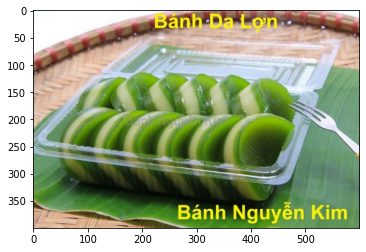

In [25]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/' + fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(155,155))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Giá trị dự đoán: ', label[np.argmax(y_predict)])